In [1]:
import pandas as pd
import os, glob
import zipfile

#folder= "Chicago/"
#file_list= sorted(glob.glob(folder+'/*.csv.gz'))
#file_list

#df= pd.concat([pd.read_csv('Data/Chicago/Chicago_Crime_2001-2022.zip') for f in file_list])
#df
#csv_files_path = 'info/*.csv'
#file_list = glob.glob(csv_files_path)
#file_list

#df = pd.concat([pd.read_csv(f) for f in file_list])
#df

In [2]:
import zipfile
import pandas as pd

# Open the ZIP file
with zipfile.ZipFile('info/Chicago_Crime_2001-2022.zip') as zf:
    file_list = zf.namelist()
    
    dfs = []
    
    for file_name in file_list:
        if file_name.endswith('.csv'):
            with zf.open(file_name) as f:
                df = pd.read_csv(f)
            dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

combined_df.to_csv('combined_data.csv', index=False)

print(combined_df)

               ID                    Date        Primary Type  \
0         1326041  01/01/2001 01:00:00 AM             BATTERY   
1         1319931  01/01/2001 01:00:00 PM             BATTERY   
2         1324743  01/01/2001 01:00:00 PM            GAMBLING   
3         1310717  01/01/2001 01:00:00 AM     CRIMINAL DAMAGE   
4         1318099  01/01/2001 01:00:00 AM             BATTERY   
...           ...                     ...                 ...   
7713104  12938029  12/31/2022 12:50:00 PM             ASSAULT   
7713105  12937822  12/31/2022 12:50:00 PM             ASSAULT   
7713106  12937583  12/31/2022 12:52:00 AM             BATTERY   
7713107  12938420  12/31/2022 12:52:00 PM             ASSAULT   
7713108  12939906  12/31/2022 12:59:00 PM  DECEPTIVE PRACTICE   

                                     Description  \
0                                         SIMPLE   
1                                         SIMPLE   
2                            ILLEGAL ILL LOTTERY   
3          

In [3]:
df= pd.read_csv('combined_data.csv')
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...,...
7713104,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
7713105,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
7713106,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098
7713107,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713109 entries, 0 to 7713108
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 603.2+ MB


In [5]:
df= df.set_index('Date')

In [6]:
#Topic 1) Comparing Police Districts
crime= df['District'].value_counts().sort_values(ascending=True)
crime

21.0         4
31.0       236
20.0    136112
17.0    222523
24.0    232700
22.0    252722
16.0    257949
14.0    298794
1.0     310778
15.0    331469
10.0    332395
5.0     342118
18.0    345666
19.0    345934
2.0     364725
9.0     377311
12.0    381247
3.0     391059
4.0     437746
25.0    439160
7.0     447273
6.0     450645
11.0    495947
8.0     518549
Name: District, dtype: int64

In [7]:
crime_per_yr = df.groupby([ 'Date','District','Arrest','Domestic','Beat']).size().reset_index(name='Count')
crime_per_yr

,Date,District,Arrest,Domestic,Beat,Count
0,2001-01-01 00:00:00,1.0,False,False,111,1
1,2001-01-01 00:00:00,1.0,False,False,122,1
2,2001-01-01 00:00:00,2.0,False,False,211,1
3,2001-01-01 00:00:00,2.0,False,False,231,1
4,2001-01-01 00:00:00,2.0,False,False,233,1
...,...,...,...,...,...,...
7584393,2022-12-31 23:45:00,22.0,False,False,2234,1
7584394,2022-12-31 23:47:00,22.0,True,False,2221,2
7584395,2022-12-31 23:50:00,15.0,False,True,1523,1
7584396,2022-12-31 23:50:00,24.0,False,False,2431,1


<Axes: title={'center': 'Crimes Across the Years'}, xlabel='Year', ylabel='Number of Arrests'>

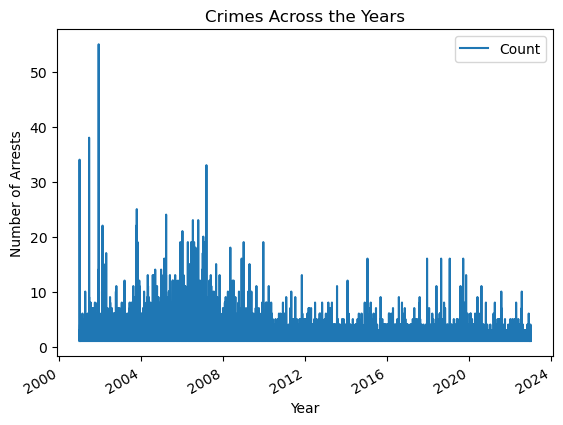

In [8]:
#Topic 2) Crimes Across the Years

df_ts = crime_per_yr.plot(x='Date', y='Count', xlabel='Year', ylabel='Number of Arrests', title='Crimes Across the Years')
df_ts

In [9]:
#Topic 4) Comparing Months

# Set 'Date' column as datetime index
crime_per_yr.set_index('Date', inplace=True)

# Resample the datetime index to monthly frequency
crime_per_yr_resampled = crime_per_district_year.resample("M").mean()
crime_per_yr_resampled

NameError: name 'crime_per_district_year' is not defined

In [ ]:
crime_per_yr_resampled.plot(x='Date', y='Count', xlabel='Month', ylabel='Number of Arrests', title='Crimes Across the Years')